# Foundations of Computational Economics #41

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Endogenous gridpoint method (EGM)

<img src="_static/img/lecture.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/MZ0MmprYMQo](https://youtu.be/MZ0MmprYMQo)

Description: Fastest and most accurate solution methods for consumption-savings model. Class of models solvable by EGM. Generalizations of EGM method.

### Endogenous gridpoint method (EGM)

- *fastest and most accurate* solution methods for *particular* problems with continuous choice  
- finite and infinite horizon, discrete time  
- best way to solve stochastic consumption-savings problem  
- applicable to many other important problems  
- has multiple generalizations which are applicable to a larger class of problems  


1. Theory in this video  
1. Implementation in the next video  

#### EGM is like magic

Most accurate solution method for consumption-savings problem we have so far?

- time iterations = repeatedly solving F.O.C. in the Bellman maximization problem *in every point in the state space*  
- VFI with continuous choices = repeatedly solving optimization problem *in every point in the state space*  


EGM on the other hand: **no root-finding operations!**

- but .. only applies to a certain class of problems  
- hard to grasp right away, best studied by example  

#### Consumption-savings problem (Deaton model)

$$
V(M)=\max_{0 \le c \le M}\big\{u(c)+\beta \mathbb{E}_{y} V\big(\underset{=M'}{\underbrace{R(M-c)+\tilde{y}}}\big)\big\}
$$

- discrete time, infinite horizon  
- one continuous choice of consumption $ 0 \le c \le M $  
- state space: consumable resources in the beginning of the period $ M $, discretized  
- income $ \tilde{y} $, follows log-normal distribution with $ \mu = 0 $ and $ \sigma $  

#### Euler equation for Deaton model

FOC: $ \quad u'(c^\star) - \beta R \mathbb{E}_{y} V'\big(R(M-c^\star)+\tilde{y}\big) = 0 $

Envelope theorem: $ \quad V'(M) = \beta R \mathbb{E}_{y} V'\big(R(M-c^\star)+\tilde{y}\big) $

**Euler equation**:

$$
u'\big(c^\star(M)\big) = \beta R \mathbb{E}_{y} u'\big(c^\star\big(\underset{=M'}{\underbrace{R[M-c^\star(M)]+\tilde{y}}}\big)\big)
$$

(see video 39)

#### New variable needed for EGM

Let $ A $ denote **end-of-period** wealth = wealth after consumption (savings)

Timing of the model:

$$
M \rightarrow c(M) \rightarrow A = M-c(M) \rightarrow M' = R(M-c(M)) + \tilde{y} = RA + \tilde{y}
$$

$$
0 \le c \le M \; \Rightarrow \; 0 \le A = M-c \le M
$$

- $ A $ contains all the information needed for the calculation of the expected value function in the next period, “sufficient statistic” for the current period state and choice  
- $ A $ is often referred to as *post-decision state*  

#### Euler equation with post-decision state

$$
u'\big(c(M)\big) = \beta R \mathbb{E}_{y} u'\big(c(RA+\tilde{y})\big)
$$

- if policy function $ c(M) $ is optimal, then it satisfies the above equation with $ A = M-c(M) $  
- given any policy function $ c(M) $, an updated policy function $ c'(M') $ is given as a *parameterized curve*  


$$
\begin{cases}
c' = (u')^{-1} \Big( \beta R \mathbb{E}_{y} u'(c\big(RA+\tilde{y})\big) \Big) \\
M' = A + c'
\end{cases}
$$

- where parameter $ A $ ranges over the interval $ (0,M) $  

#### Coleman-Reffett operator

Recall *Coleman-Reffett operator* $ K(c)(M) : \mathcal{P} \rightarrow \mathcal{P} $

- takes as input policy function $ c(M) \in \mathcal{P} $  
- returns the updated policy function $ c'(M) \in \mathcal{P} $ that for every $ M $ satisfies  


$$
u'\big(c'(M)\big) = \beta R \mathbb{E}_{y} u'\big(c[R(M-c'(M))+\tilde{y}]\big)
$$

Standard implementation:

1. Fix grid over $ M $  
1. With given $ c(M) $ solve the equation for $ c $ in each point $ M $ on the grid  

#### EGM implementation of Coleman-Reffett operator

1. Fix grid over $ A $  
1. With given $ c(M) $ for each point on the grid compute  


$$
\begin{cases}
c' = (u')^{-1} \Big( \beta R \mathbb{E}_{y} u'(c\big(RA+\tilde{y})\big) \Big) \\
M' = A + c'
\end{cases}
$$

1. Build the returned policy function $ c'(M) $ as interpolation over computed points $ (M',c') $  


*EGM is time iterations solver with a much more efficient implementation of Coleman-Reffett operator*

#### EGM algorithm

1. Set a grid on (discretize) post-decision state $ A $ instead of state $ M $  
1. Set the initial policy $ c_0(M) = M $ defined over two points $ M \in \{0,\bar{M}\} $  
1. Increment iteration counter $ i $ (initialized to 0)  
1. For each point $ A_j $ on the grid over $ A $ perform the **EGM step** and return the corresponding value of
  consumption $ c_j $ and the endogenous point of wealth $ M_j = A_j+c_j $  
1. Combine all computed endogenous points in the state space $ M_j $, and their corresponding consumption levels $ c_j $ to build the
  updated policy function $ c_i(M) $  
1. Return to step 3, unless convergence achieved (policy functions $ c_i(M) $ and $ c_{i-1}(M) $ are within given tolerance)  

#### EGM algorithm (EGM step)

Given point $ A_j $ on the grid over $ A $:
1. Compute the next period wealth $ M'_j = RA_j + \tilde{y} $, replacing $ \tilde{y} $ with quadrature points
2. Compute the optimal consumption in the next period in all quadrature points, using the previous iteration policy function $ c_{i-1}(\cdot) $
3. Compute the marginal utility for each value of consumption, and complete the calculation of the expectation in RHS of Euler equation
4. Using inverse marginal utility function, compute optimal consumption $ c_j $ in current period, corresponding to the point $ A_j $
5. complete the EGM step by computing endogenous state point $ M_j = A_j + c_j $

#### Properties of EGM algorithm

- successive approximations in the policy function space  
- same structure as time iterations, with new implementation of Coleman-Reffett operator  
- the updating of policy function is done with the EGM step  
- **no root-finding operations**, direct computation instead $ \rightarrow $ **fast**  
- Euler equation holds in the generated endogenous state points $ \rightarrow $ **accurate**  

#### EGM principle

- Instead of finding the optimal decision in each point of a fixed grid over the state space ..  
- find the point in the state space where a “guessed” decision would be optimal.  

#### Example using deterministic consumption-savings model

$$
V(M)=\max_{0 \le c \le M}\big\{log(c)+\beta V\big(R(M-c)+y\big)\big\}
$$

$$
u'\big(c^\star(M)\big) = \beta R u'\big(c^\star\big(R[M-c^\star(M)]+y\big)\big)
$$

$$
\begin{cases}
c' = (u')^{-1} \Big( \beta R u'(c\big(RA+y)\big) \Big) \\
M' = A + c
\end{cases}
$$

In [1]:
%clear  # clear notebook memory
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

beta,R,y = 0.95,1.,0.    # fundamentals (cake eating)
Mbar,ngrid = 10,5        # technical parameters
u = lambda c: np.log(c)  # utility function
mu = lambda c: 1/c       # marginal utility function
imu = lambda u: 1/u      # inverse marginal utility function

A = np.linspace(0,Mbar,ngrid)  # What are the bounds of A?
c0 = np.array([0,Mbar])
M0 = np.array([0,Mbar])

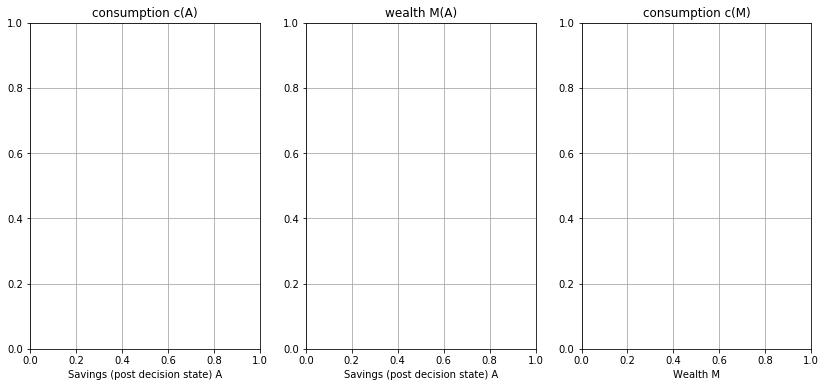

In [2]:
# set up plotting
fig, ax = plt.subplots(1,3,figsize=(14,6))
for axi in ax:
    axi.grid(b=True, which='both', color='0.65', linestyle='-')
ax[0].set_title('consumption c(A)')
ax[1].set_title('wealth M(A)')
ax[2].set_title('consumption c(M)')
ax[0].set_xlabel('Savings (post decision state) A')
ax[1].set_xlabel('Savings (post decision state) A')
ax[2].set_xlabel('Wealth M')
# make colors generator
# https://stackoverflow.com/questions/37890412/increment-matplotlib-color-cycle
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
def plot_iter(a,m,c):
    color = next(colors)
    ax[0].plot(a,c,linewidth=0.5,c=color)
    ax[1].plot(a,m,linewidth=0.5,c=color)
    ax[2].plot(m,c,linewidth=0.5,c=color)
    ax[0].scatter(a,c,s=11,c=color)
    ax[1].scatter(a,m,s=11,c=color)
    ax[2].scatter(m,c,s=11,c=color)
    return fig

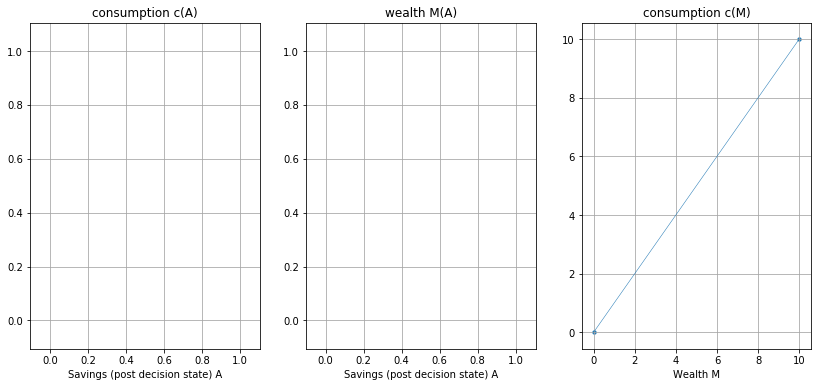

In [3]:
# Iteration 0
plot_iter(np.full(2,np.nan),M0,c0)

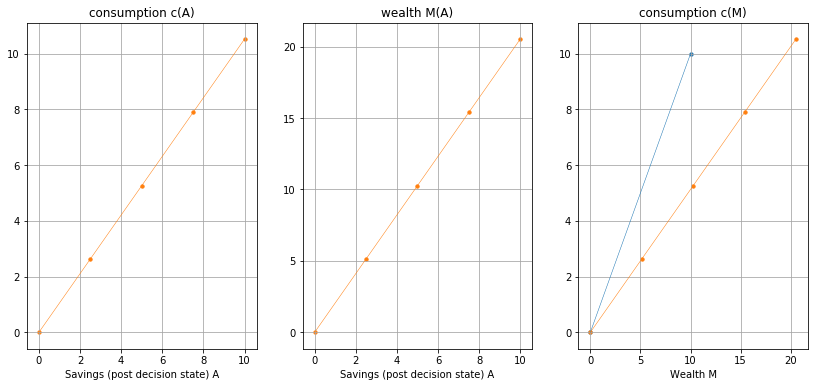

In [4]:
# Iteration 1
policy = interpolate.interp1d(M0,c0,kind='slinear',fill_value="extrapolate")  # interpolation function for policy
M1 = np.full(ngrid,np.nan)
c1 = np.full(ngrid,np.nan)
for j,aj in enumerate(A):
    Mpr = max(R*aj+y,1e-10)        # next period wealth
    cpr = policy(Mpr)              # next period consumption
    c1[j] = imu( beta*R*mu(cpr) )  # inverse Euler
    M1[j] = aj + c1[j]             # endogenous wealth
plot_iter(A,M1,c1)             # returns fig object, plotted automatically

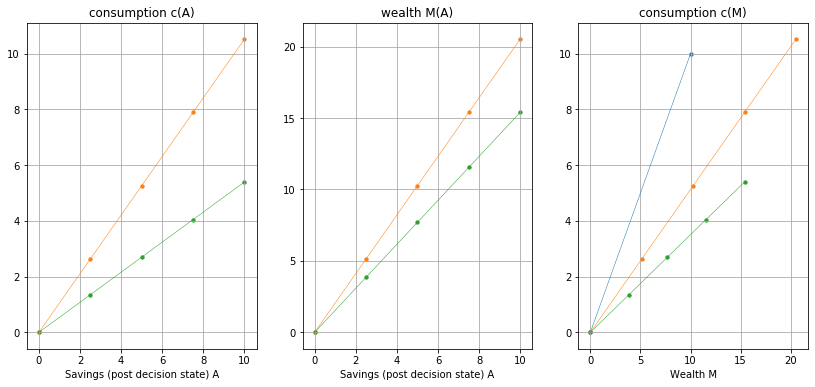

In [5]:
# Iteration 2
policy = interpolate.interp1d(M1,c1,kind='slinear',fill_value="extrapolate")  # interpolation function for policy
M2 = np.full(ngrid,np.nan)
c2 = np.full(ngrid,np.nan)
for j,aj in enumerate(A):
    Mpr = max(R*aj+y,1e-10)        # next period wealth
    cpr = policy(Mpr)              # next period consumption
    c2[j] = imu( beta*R*mu(cpr) )  # inverse Euler
    M2[j] = aj + c2[j]             # endogenous wealth
plot_iter(A,M2,c2)             # returns fig object, plotted automatically

### Corner solutions in EGM

- So far only covered the interior solutions where the Euler equation holds  
- What about the restriction $ 0 \le c \le M $ which is equivalent to $ 0 \le A \le M $?  


1. By choosing the grid on $ A $ to respect the constraint $ 0 \le A \le M $ EGM only implements interior solutions  
1. Corner solutions must be added with an additional provisions in the code  

#### Lower bound on consumption

- $ c \ge 0 $ is never binding if utility function satisfies  


$$
\lim_{c \rightarrow 0} u(c) = -\infty
$$

- all our usual utility functions like $ \log(c) $ or CRRA utility $ \frac{c^\lambda - 1}{\lambda} $ satisfy this condition  

#### Upper bound on consumption

- If $ c \le M $ is binding, then $ A=0 $, can be computed directly  


**Proposition** If utility function $ u(c) $ in the consumption-savings model is monotone and concave, then end-of-period wealth $ A=M-c $ is non-decreasing in M.

- Let $ M_0 = (u')^{-1} \Big( \beta R \mathbb{E}_{y} u'(c(\tilde{y})\big) \Big) $ denote the point that corresponds to $ A=0 $  
- Due to the proposition, for all $ M<M_0 $ the end of period wealth must be zero, and thus optimal consumption $ c=M $ is the corner solution  
- To implement this in the code, we just need to add a 45 degrees segment to the consumption function below $ M_0 $  

In [6]:
%clear  # clear notebook memory
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

beta,R,y = 0.95,1.05,1   # fundamentals
Mbar,ngrid = 10,5        # technical parameters
u = lambda c: np.log(c)  # utility function
mu = lambda c: 1/c       # marginal utility function
imu = lambda u: 1/u      # inverse marginal utility function

A = np.linspace(0,Mbar,ngrid)  # What are the bounds of A?
c0 = np.array([0,Mbar])
M0 = np.array([0,Mbar])

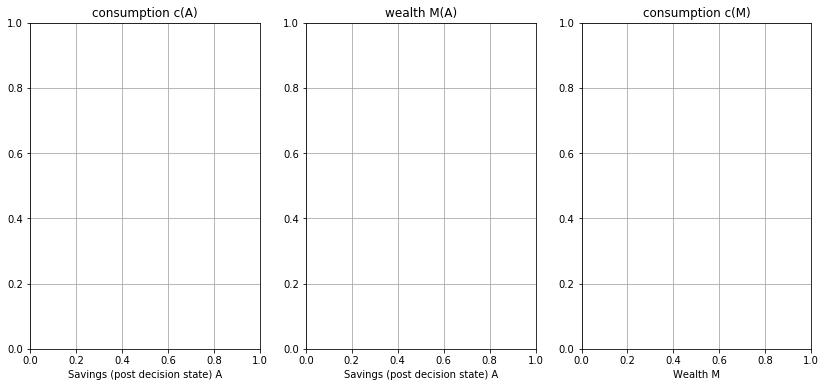

In [7]:
# set up plotting
fig, ax = plt.subplots(1,3,figsize=(14,6))
for axi in ax:
    axi.grid(b=True, which='both', color='0.65', linestyle='-')
ax[0].set_title('consumption c(A)')
ax[1].set_title('wealth M(A)')
ax[2].set_title('consumption c(M)')
ax[0].set_xlabel('Savings (post decision state) A')
ax[1].set_xlabel('Savings (post decision state) A')
ax[2].set_xlabel('Wealth M')
# make colors generator
# https://stackoverflow.com/questions/37890412/increment-matplotlib-color-cycle
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
def plot_iter(a,m,c):
    color = next(colors)
    ax[0].plot(a,c,linewidth=0.5,c=color)
    ax[1].plot(a,m,linewidth=0.5,c=color)
    ax[2].plot(m,c,linewidth=0.5,c=color)
    ax[0].scatter(a,c,s=11,c=color)
    ax[1].scatter(a,m,s=11,c=color)
    ax[2].scatter(m,c,s=11,c=color)
    return fig

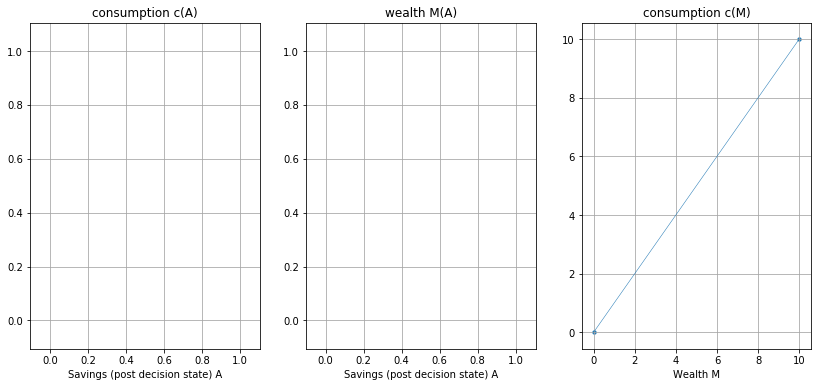

In [8]:
# Iteration 0
plot_iter(np.full(2,np.nan),M0,c0)

In [9]:
# Iteration function
Aex = np.full(ngrid+1,np.nan)
Aex[1:] = A
def iter(M0,c0):
    policy = interpolate.interp1d(M0,c0,kind='slinear',fill_value="extrapolate")  # interpolation function for policy
    M1 = np.full(ngrid+1,np.nan)
    c1 = np.full(ngrid+1,np.nan)
    M1[0] = c1[0] = 0              # add one point at the origin!
    for j,aj in enumerate(A):
        Mpr = max(R*aj+y,1e-10)    # next period wealth
        cpr = policy(Mpr)          # next period consumption
        c = imu( beta*R*mu(cpr) )  # inverse Euler
        M = aj + c                 # endogenous wealth
        M1[j+1] = M                # save to array
        c1[j+1] = c
    pt = plot_iter(Aex,M1,c1)        # returns fig object, plotted automatically
    return M1,c1,pt

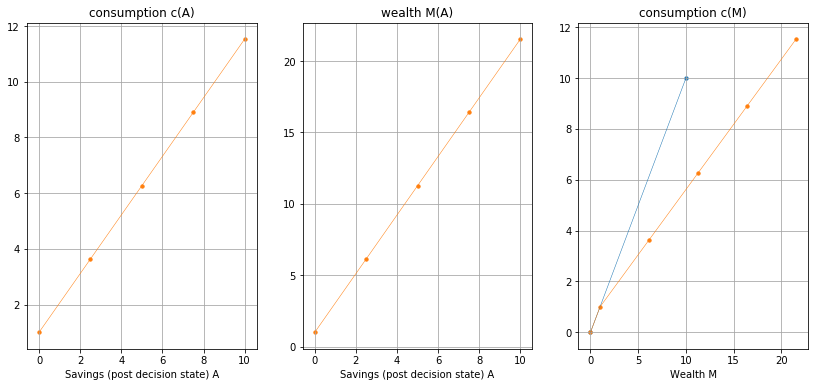

In [10]:
M1,c1,pt = iter(M0,c0)
pt

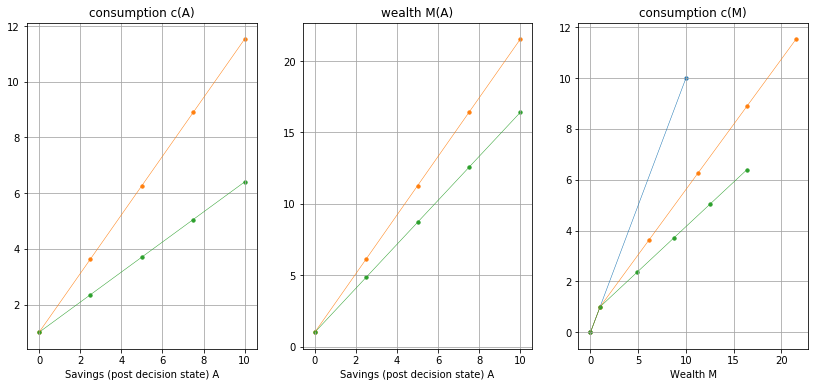

In [11]:
M,c,pt = iter(M1,c1)
pt

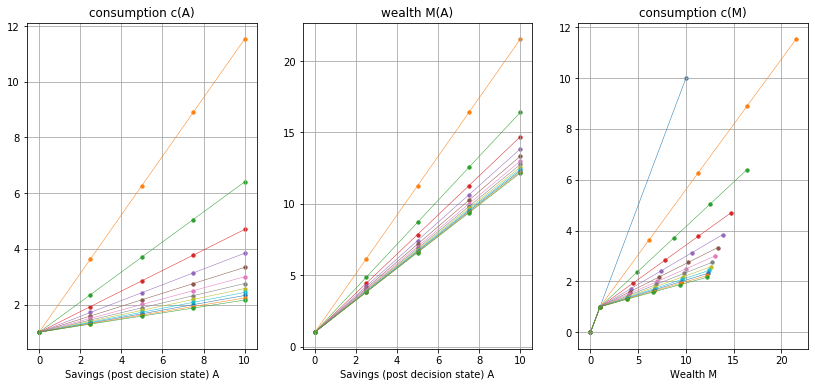

In [12]:
for i in range(10):
    M,c,pt = iter(M,c)
pt

### Class of models solvable by EGM

- finite and infinite horizon dynamic models with continuous choice  
- strictly concave monotone and differentiable utility function (with analytic inverse marginal)  
- one continuous state variable (wealth) and one continuous choice variable (consumption)  
- particular structure of the law of motion for state variables (intertemporal budget constraint)  
- occasionally binding borrowing constraints  
- can also easily allow additional quasi-exogenous state variables (with motion rules dependent on $ A $ and not $ M $ or $ c $)  


Rather small class, although many important models in micro and macro economics are included

### Generalizations of EGM

Multiple dimensions: hard because irregular grids in multiple dimensions

- 📖 Barillas & Fernandez-Villaverde, JEDC 2007 “A Generalization of the Endogenous Grid Method”  
- 📖 Ludwig & Schön, Computational Economics, 2018 “Endogenous Grids in Higher Dimensions: Delaunay Interpolation and Hybrid Methods”  
- 📖 Matthew White, JEDC 2015 “The Method of Endogenous Gridpoints in Theory and Practice”  
- 📖 Iskhakov, Econ Letters 2015 “Multidimensional endogenous gridpoint method: solving triangular dynamic stochastic optimization problems without root-finding operations” + Corrigendum  

### Generalizations of EGM

Non-convex problems: hard because Euler equation is not a sufficient condition any longer

- 📖 Giulio Fella, RED 2014 “A Generalized Endogenous Grid Method for Non-Smooth and Non-Concave Problems”  
- 📖 Iskhakov, Jørgensen, Rust, Schjerning, QE 2017 “The Endogenous Grid Method for Discrete-Continuous Dynamic Choice Models with (or without) Taste Shocks”  
- 📖 Jeppe Druedahl, Thomas Jørgensen, JEDC 2017 “A General Endogenous Grid Method for Multi-Dimensional Models with Non-Convexities and Constraints”  

### Further learning resources

- 📖 Chris Carroll (2006) Original article on EGM
  [http://pages.stern.nyu.edu/~dbackus/Computation/Carroll%20endog%20grid%20EL%2006.pdf](http://pages.stern.nyu.edu/~dbackus/Computation/Carroll%20endog%20grid%20EL%2006.pdf)  
- Literature cited above  
- 📖 >500 citations of Carroll’s paper
  [https://scholar.google.com/scholar?cites=20745560105937946&as_sdt=2005&sciodt=0,5&hl=en](https://scholar.google.com/scholar?cites=20745560105937946&as_sdt=2005&sciodt=0,5&hl=en)  